 # Elemento rectangular de 4 nodos en elasticidad plana

Análisis de Estructuras. Grado en Ingeniería Civil. 

Autores: 

+ Alejandro E. Martínez-Castro, Esther Puertas García, Rafael Gallego.
+ Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.


## Interpolación de desplazamientos y deformaciones. 

El campo de desplazamiento se determinará como

\begin{equation}
\mathbf{u} = \mathbf{N}\cdot \mathbf{a}
\end{equation}

En este elemento, los desplazamiento se interpolan a partir de los valores de $u$ y $v$ en cuatro nodos:

Consideremos un elemento de 4 nodos. El elemento es rectangular, de base $2a$ y altura $2b$. 
La interpolación se establece a partir de: 

- Las coordenadas de los 4 vértices, $(-a, -b),(a,-b),(a,b),(-a,b)$. 
- Los desplazamientos en los 4 nodos, $(u_1,v_1),(u_2,v_2),(u_3,v_3),(u_4,v_4)$. 

\begin{equation}
\begin{pmatrix} u \\ v \end{pmatrix} = 
\left[
\begin{matrix}
N_1 & 0 & N_2 & 0 & N_3 & 0 & N_4 & 0 \\
0 & N_1 & 0 & N_2 & 0 & N_3 & 0 & N_4 
\end{matrix}
\right] \cdot \begin{pmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \\ u_3 \\ v_3 \\ u_4 \\ v_4 \end{pmatrix}
\end{equation}

Esta relación inducirá una relación para el vector $\boldsymbol{\varepsilon}$, 

\begin{equation}
\boldsymbol{\varepsilon} = \mathbf{B}\cdot \mathbf{a}
\end{equation}

## Funciones de forma

A continuación se obtiene las funciones de forma. 

Para este elemento, la base $\mathcal{B} = \lbrace 1,x,y,x\,y \rbrace$, es decir $[1,x]\times[1,y]$

Esta es una base completa de los polinomios de grado parcial 1 sobre $(x,y)$. 

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6.1 (Python 2.7.11-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


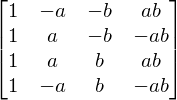

In [2]:
base = Matrix([[1,x,y,x*y]])

a,b = symbols('a b')
matM = Matrix.vstack(base.subs([(x,-a),(y,-b)]),
                     base.subs([(x,a),(y,-b)]),
                     base.subs([(x,a),(y,b)]),
                     base.subs([(x,-a),(y,b)]))
matM

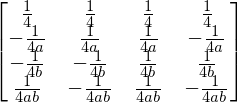

In [3]:
Inv_matM = matM.inv()
Inv_matM

In [4]:
N1 = base.dot(Inv_matM.col(0))
N2 = base.dot(Inv_matM.col(1))
N3 = base.dot(Inv_matM.col(2))
N4 = base.dot(Inv_matM.col(3))

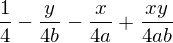

In [5]:
N1

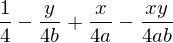

In [6]:
N2

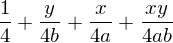

In [7]:
N3

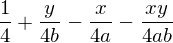

In [8]:
N4

## Vector de deformaciones

El vector de deformaciones se expresa mediante el siguiente producto: 

\begin{equation}
\boldsymbol{\varepsilon} = \begin{pmatrix} \varepsilon_{nx} \\ \varepsilon_{ny} \\ \gamma_{xy} \end{pmatrix}
\end{equation}

Y en función de las funciones de forma: 

\begin{equation}
\boldsymbol{\varepsilon} = \left[ 
\begin{matrix}
\dfrac{\partial N_1}{\partial x} & 0 & \dfrac{\partial N_2}{\partial x} & 0 & \dfrac{\partial N_3}{\partial x} & 0 & \dfrac{\partial N_4}{\partial x} & 0 \\
0 & \dfrac{\partial N_1}{\partial y} & 0 & \dfrac{\partial N_2}{\partial y} & 0 & \dfrac{\partial N_3}{\partial y} & 0 & \dfrac{\partial N_4}{\partial y} \\
\dfrac{\partial N_1}{\partial y} & \dfrac{\partial N_1}{\partial x} & \dfrac{\partial N_2}{\partial y} & \dfrac{\partial N_2}{\partial x} & \dfrac{\partial N_3}{\partial y} & \dfrac{\partial N_3}{\partial x} & \dfrac{\partial N_4}{\partial y} & \dfrac{\partial N_4}{\partial x}
\end{matrix} \right] \cdot
\begin{pmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \\ u_3 \\ v_3 \end{pmatrix}
\end{equation}

Relación que puede escribirse como: $\boldsymbol{\varepsilon} = \mathbf{B} \cdot \mathbf{a}$.

La matriz $\mathbf{B}$ en este contexto se denomina _matriz de deformación_.


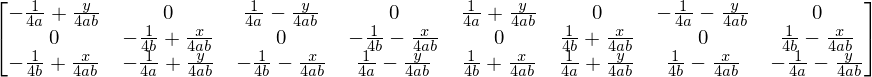

In [9]:
Nu = Matrix([[N1, 0, N2, 0, N3, 0, N4, 0]])
Nv = Matrix([[0, N1, 0, N2, 0, N3, 0, N4]])
B = Matrix.vstack(Nu.diff(x),Nv.diff(y),Nu.diff(y)+Nv.diff(x))
B

**Observación**: En este elemento, la matriz $\mathbf{B}$ no es constante. Observe la dependencia de las variables $x$ e $y$.

El elemento de 4 nodos rectangular genera una deformación no constante en el elemento. 

La variación es lineal. 

## Matriz de rigidez

La expresión de la matriz de rigidez en un elemento es

\begin{equation}
\mathbf{K} = \int_{\Omega} \mathbf{B}^T \cdot \mathbf{D} \cdot \mathbf{B} \, d \Omega 
\end{equation}

Siendo $\mathbf{D}$ la matriz de constantes elásticas de elasticidad plana. 

Puesto que el elemento es rectangular, esta integral puede expresarse como: 

\begin{equation}
\mathbf{K} = \int_{x=-a}^{x=a} \int_{y=-b}^{y=b} \mathbf{B}^T \cdot \mathbf{D} \cdot \mathbf{B} \, dx \,dy 
\end{equation}



In [10]:
d11,d12,d33 = symbols('d11 d12 d33')
D = Matrix([[d11, d12, 0],[d12,d11,0],[0,0,d33]])

krigidez = integrate(B.T.multiply(D).multiply(B),(x,-a,a),(y,-b,b))


La matriz de rigidez $\mathbf{K}$ puede expresarse como: 

\begin{equation}
\mathbf{K} = \left[ \begin{matrix}
\mathbf{K_{11}} & \mathbf{K_{12}} & \mathbf{K_{13}} & \mathbf{K_{14}}\\
\mathbf{K_{21}} & \mathbf{K_{22}} & \mathbf{K_{23}} & \mathbf{K_{24}}\\
\mathbf{K_{31}} & \mathbf{K_{32}} & \mathbf{K_{33}} & \mathbf{K_{34}} \\
\mathbf{K_{41}} & \mathbf{K_{42}} & \mathbf{K_{43}} & \mathbf{K_{44}}
\end{matrix} \right] 
\end{equation}

Con 

\begin{equation}
\mathbf{K_{ij}} = \int_{x=-a}^{x=a} \int_{y=-b}^{y=b} \mathbf{B_i}^T \cdot \mathbf{D} \cdot \mathbf{B_j} \,dx\,dy
\end{equation}

Con la relación: 


\begin{equation}
\mathbf{K_{ji}} = \mathbf{K_{ij}}^T
\end{equation}

In [11]:
k11 = krigidez[0:2,0:2]
k22 = krigidez[2:4,2:4]
k33 = krigidez[4:6,4:6]
k44 = krigidez[6:8,6:8]

k12 = krigidez[0:2,2:4]
k13 = krigidez[0:2,4:6]
k14 = krigidez[0:2,6:8]

k23 = krigidez[2:4,4:6]
k24 = krigidez[2:4,6:8]

k34 = krigidez[4:6,6:8]

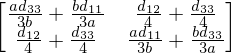

In [12]:
k11.simplify()
k11

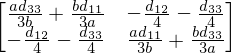

In [13]:
k22.simplify()
k22

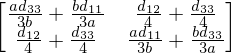

In [14]:
k33.simplify()
k33

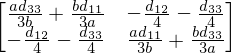

In [15]:
k44.simplify()
k44

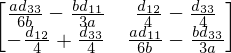

In [16]:
k12.simplify()
k12

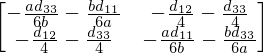

In [17]:
k13.simplify()
k13

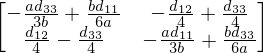

In [18]:
k14.simplify()
k14

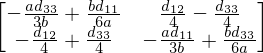

In [19]:
k23.simplify()
k23

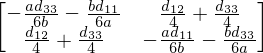

In [20]:
k24.simplify()
k24

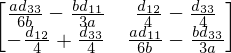

In [21]:
k34.simplify()
k34

## Vector de fuerzas debido a fuerzas volumétricas. 

En la expresión del PTV interviene el vector de fuerzas interiores, volumétricas, $\mathbf{b}$, generando fuerzas nodales equivalentes. Para un elemento: 

\begin{equation}
\mathbf{f}_b = \int_{\Omega} \mathbf{N}^T \cdot \mathbf{b} \,d \Gamma
\end{equation}

La integración genera fuerzas nodales en los cuatro nodos: 

\begin{equation}
\mathbf{f}_b = \dfrac{A}{4} \,\begin{pmatrix} b_x \\b_y \\b_x \\b_y \\ b_x \\ b_y \\b_x \\b_y \end{pmatrix}
\end{equation}

Siendo $A= 4\,a\,b$. 

Si la fuerza por unidad de volumen corresponde al peso propio, entonces $b_x = 0$ y $b_y = - \rho \,g$, siendo $\rho$ la densidad volumétrica del material, y $g$ la constante gravitatoria. 

Por tanto, para el caso de fuerzas debidas a peso propio, se tomará: 

\begin{equation}
\mathbf{f}_b = \dfrac{A}{4} \,\begin{pmatrix} 0 \\ -\rho \,g \\ 0 \\- \rho \,g  \\ 0 \\ -\rho \,g \\0\\-\rho\,g\end{pmatrix}
\end{equation}

## Vector de fuerzas debido a tensiones en el contorno

Al igual que ocurre con el elemento de 3 nodos, en el caso del elemento de 4 nodos las fuerzas sobre el contorno producen términos de fuerzas nodales en los lados cargados. Por tanto, sólo aparecerán fuerzas nodales en elementos que compartan alguno de sus lados con los lados cargados. 

Puesto que la geometría es sencilla, consideremos el cálculo para carga constante en el lado $1-2$. 


In [22]:
matN = Matrix.vstack(Nu,Nv)
tx,ty = symbols('tx ty')
vect = Matrix([[tx,ty]]).T
producto = matN.T.multiply(vect)
producto = producto.subs(y,-b)
f_t = integrate(producto,(x,-a,a))

In [23]:
f_t.simplify()

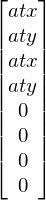

In [24]:
f_t

Del mismo modo, para el lado cargado 1-2, con carga constante: 


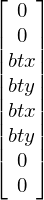

In [25]:
producto = matN.T.multiply(vect)
producto = producto.subs(x,a)
f_t = integrate(producto,(y,-b,b))
f_t.simplify()
f_t

## Consideración sobre el comportamiento del elemento de 4 nodos

El elemento de 4 nodos ofrece una buena solución para los casos en los que el comportamiento sea de tracción-compresión. 

En problemas en los que el comportamiento predominante sea de flexión, este elemento requiere mallas muy tupidas para obtener resultados aceptables. 

La mala disponibilidad de este elemento para modelar estados de flexión tiene una explicación muy instructiva. 

Para un elemento, la solución exacta con teoría de vigas puede escribirse como: 

\begin{align}
u(x,y) & = \dfrac{M}{E\,I}\,r\,s \\
v(x,y) & = \dfrac{M\,a^2}{2\,E\,I} \,\left( 1 - \dfrac{x^2}{a^2} \right) + \dfrac{M\,b^2}{2\,E\,I}\,\left( 1 - \dfrac{y^2}{b^2} \right)
\end{align}

El elemento rectangular, por tener lados rectos, sólo puede representar el modo de desplazamiento de flexión: 

\begin{align}
u & = \overline{u}\, x\,y \\
v & = 0
\end{align}

El elemento no puede reproducir correctamente la distribución de desplazamientos verticales en un estado de flexión, lo que le confiere una rigidez excesiva. 

Adicionalmente, la distribución exacta de deformaciones tangenciales es: 

\begin{equation}
\gamma_{xy} = \dfrac{\partial u}{\partial y} + \dfrac{\partial v}{\partial x} = 0
\end{equation}

Sin embargo, en la solución aproximada, 

$$\gamma_{xy} = \overline{u}\,x$$

El elemento contiene un "exceso" de deformaciones tangenciales. Esto genera una rigidez adicional que le incapacita para reproducir estados de tensión. 

Una forma de eliminar este exceso consiste en evaluar $\gamma_{xy}$ en el centro (donde x=0 y por tanto, \gamma_{xy} =0$). Esta es la base del método de _integración reducida_. 

Existen otras formas de resolver este problema: 

- Adición de nodos interiores. 
- Integración reducida de los términos de deformación tangencial. 
- Adición de modos incompatibles. 
- Imposición de un campo de deformaciones. 

En SAP 2000, por ejemplo, pueden encontrarse opciones para Elementos Incompatibles (opción "Incompatible Modes"), para mejorar el comportamiento a flexión del elemento. 